In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the data
df = pd.read_excel('/home/master1/Git/Option-CDEFGH/Option C/Option-c prediction 6/OPTION-C.xlsx')

# Drop rows with all NaN values
df1 = df.dropna(how='all')

# Drop unnecessary columns
columns_to_drop = df1.columns[26:34] 
df1.drop(columns_to_drop, axis=1, inplace=True)

# Rename the columns
df1.columns = ["Col"+str(i) for i in range(26)]

# Separate features and target
X = df1.drop('Col25', axis=1)
y = df1['Col25']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shape of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)





Shape of X_train: (29, 25)
Shape of X_val: (10, 25)
Shape of X_test: (10, 25)
Shape of y_train: (29,)
Shape of y_val: (10,)
Shape of y_test: (10,)


In [2]:

# Set the seed
SEED = 42

# Instantiate the model (here, a decision tree classifier)
tree = DecisionTreeClassifier(max_depth=5, random_state=SEED)

# Train the model using the training data
tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree.predict(X_test)

# Define a function to print scores
def print_scores(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

# Print the scores
print_scores(y_test, y_pred)




Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/HDD2/miniconda3/envs/astro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/HDD2/miniconda3/envs/astro/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


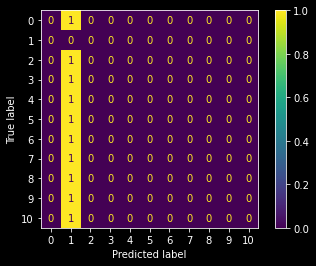

In [3]:
# Displaying confusion matrix
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()